In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 11.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=89550fbb8865c6c95d9039865622528fcf432c83767e9d881ba46b7aca139bb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-m7fbs6v8/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install -U "scikit-learn==0.23.1"

     |████████████████████████████████| 6.8MB 5.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os.path
from os import path

In [ ]:
ticker_list=['BRK-B','BRK-A','MSFT','AAPL']
today = date.today()
l = len(ticker_list)
df_dict = {} # creating a dictionay for the data
files=[]
sector=[]
for i in range(0,l):
  sector = yf.Ticker(ticker_list[i]).info['sector']
  if path.exists('./'+sector) == False:
    os.mkdir('./'+sector)
  else:
    print("folder already exist");

def getData(ticker):
  print(ticker)
  data = pdr.get_data_yahoo(ticker, start="2020-01-01", end=today).reset_index()
  data['Symbol'] = ticker 
  data['percentage Change'] = data['Adj Close'].pct_change().dropna()
  
  df_dict[ticker] = data # storing the data frames in the dictionary
  dataname= ticker+'_'+str(today)
  files.append(dataname)
  SaveData(data, dataname,yf.Ticker(ticker).info['sector'])


  
def SaveData(df, filename,sector):
  if (sector == 'Financial Services'):
    df.to_csv('./Financial Services/'+filename+'.csv')
  elif (sector == 'Technology'):
    df.to_csv('./Technology/'+filename+'.csv')
  else:
    print("sector is not being considered");

for ticker in ticker_list:
  getData(ticker)

folder already exist
folder already exist
BRK-B
[*********************100%***********************]  1 of 1 completed
BRK-A
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed


In [ ]:

# df_dict['BRK-A']["prevClose"] = df_dict['BRK-A'].Close.shift(1)
# df_dict['BRK-A']['change'] = df_dict['BRK-A'][['Open','prevClose']].pct_change(axis=1)['Close']


In [ ]:
df_dict['AAPL'].tail


<bound method NDFrame.tail of           Date        Open        High  ...     Volume  Symbol  percentage Change
0   2020-01-02   74.059998   75.150002  ...  135480400    AAPL                NaN
1   2020-01-03   74.287498   75.144997  ...  146322800    AAPL          -0.009722
2   2020-01-06   73.447502   74.989998  ...  118387200    AAPL           0.007968
3   2020-01-07   74.959999   75.224998  ...  108872000    AAPL          -0.004703
4   2020-01-08   74.290001   76.110001  ...  132079200    AAPL           0.016086
..         ...         ...         ...  ...        ...     ...                ...
322 2021-04-14  134.940002  135.000000  ...   87222800    AAPL          -0.017853
323 2021-04-15  133.820007  135.000000  ...   89347100    AAPL           0.018708
324 2021-04-16  134.300003  134.669998  ...   84818500    AAPL          -0.002528
325 2021-04-19  133.509995  135.470001  ...   93996100    AAPL           0.005069
326 2021-04-20  135.020004  135.529999  ...   94811349    AAPL      

In [ ]:
# df_corr = {}
# company =['MSFT','AAPL']
# l = len(company)
# for i in range(0,l):
#   df = df_dict['BRK-A'][['Close', 'Symbol']]
#   df_corr[ticker] =df

In [ ]:
df_corr = {}
for ticker in ticker_list:
  df_corr[ticker] = df_dict[ticker][['Date','percentage Change', 'Symbol']]
  



In [ ]:
df_corr['MSFT'].head()

,Date,percentage Change,Symbol
0,2020-01-02,NaN,MSFT
1,2020-01-03,-0.012452,MSFT
2,2020-01-06,0.002585,MSFT
3,2020-01-07,-0.009118,MSFT
4,2020-01-08,0.015928,MSFT


In [ ]:


result = pd.concat([df_corr['BRK-A'],df_corr['BRK-B'],df_corr['MSFT'], df_corr['AAPL']], axis=0)




In [ ]:
df_pivot = result.pivot('Date','Symbol','percentage Change').reset_index()

df_pivot.head()

Symbol,Date,AAPL,BRK-A,BRK-B,MSFT
0,2020-01-02,NaN,NaN,NaN,NaN
1,2020-01-03,-0.009722,-0.009075,-0.009676,-0.012452
2,2020-01-06,0.007968,0.003111,0.003581,0.002585
3,2020-01-07,-0.004703,-0.003848,-0.004714,-0.009118
4,2020-01-08,0.016086,0.000847,0.000310,0.015928


In [ ]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

Symbol,AAPL,BRK-A,BRK-B,MSFT
Symbol,,,,
AAPL,1.000000,0.565822,0.601184,0.824110
BRK-A,0.565822,1.000000,0.971402,0.608261
BRK-B,0.601184,0.971402,1.000000,0.655064
MSFT,0.824110,0.608261,0.655064,1.000000


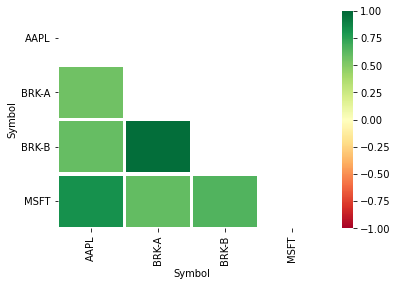

In [ ]:
mask = np.zeros_like(corr_df) # returns the an array of zeros with the same shape 

mask[np.triu_indices_from(mask)] = True # Generate a mask for the upper triangle

sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)

plt.yticks(rotation=0) 

plt.xticks(rotation=90) 
plt.show()

lagged cosscorrelation

In [ ]:
def crosscorr(companyx, companyy, lag=0):
    """ 
    Lag-N cross correlation. 
    
    lag is the no of days it is lagged

    """
    return companyx.corr(companyy.shift(lag))

In [ ]:
 xcrosscorr_days = [crosscorr(df_dict['BRK-A']['percentage Change'], df_dict['BRK-B']['percentage Change'], lag=i) for i in range(100)]

In [ ]:
max_value = max( xcrosscorr_days)
print("The highest corelation on between ",yf.Ticker("BRK-A").info['longName'] ,"and", yf.Ticker("BRK-B").info['longName'],"is",max_value)

The highest corelation on between  Berkshire Hathaway Inc. and Berkshire Hathaway Inc. is 0.9714021788013139


In [ ]:
 max_index =  xcrosscorr_days.index(max_value)
print("The highest corelation lag days between ",yf.Ticker("BRK-A").info['longName'] ,"and", yf.Ticker("BRK-B").info['longName'],"is",max_index)

The highest corelation lag days between  Berkshire Hathaway Inc. and Berkshire Hathaway Inc. is 0
